<a href="https://colab.research.google.com/github/alexontour/snippets/blob/main/snip_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author: Alexander Kollmann, 08/2022**

---

**Funktion**

Daten von URL laden und in Pandas Dataframe für die Darstellung vorbereiten

Plot/ Chart Funktionen

---



**Referenzen**

https://www.makeuseof.com/draw-graphs-jupyter-notebook/

https://colab.research.google.com/notebooks/charts.ipynb

https://jovian.ai/colab-roland/python-matplotlib-data-visualization

---



**Importieren der notwendigen Bibliotheken**

Funktionen zur Bearbeitung eines Datensatzes. Weiter Information unter  https://pandas.pydata.org/

In [ ]:
import pandas as pd

**CSV von URL in Dataframe einlesen**

Beispiel: https://www.data.gv.at/katalog/dataset/covid-19-schutzimpfungen-ausgelieferte-und-bestellte-impfdosen

Tip: im Browser die CSV vorher anschauen (nicht im EXCEL). Problem beim Laden gibt es öfters mit Sonderzeichen, daher "encoding = 'utf8'" angeben.

Die Pandas-Funktion head() zeigt die ersten 5 Zeilen an. So bekommt man einen Überblick über die geladenen Daten bzw. die Tabelle mit den Spalten und den Tabelleneinträgen.

In [ ]:
url = 'https://info.gesundheitsministerium.gv.at/data/timeline-bbg.csv'
df = pd.read_csv(url, sep=';', encoding = 'utf8')

df.head()

,Datum,BundeslandID,Bevölkerung,Name,Auslieferungen,AuslieferungenPro100,Bestellungen,BestellungenPro100
0,2021-01-09T23:59:59+01:00,0,NaN,Bundesverwaltung,0,NaN,0,NaN
1,2021-01-09T23:59:59+01:00,1,299235.0,Burgenland,355,0.118636,3995,1.335071
2,2021-01-09T23:59:59+01:00,2,566166.0,Kärnten,305,0.053871,6830,1.206360
3,2021-01-09T23:59:59+01:00,3,1708140.0,Niederösterreich,9042,0.529348,20070,1.174962
4,2021-01-09T23:59:59+01:00,4,1512226.0,Oberösterreich,520,0.034386,21395,1.414802


**Dataframe filtern (Spalte und Zeilen)**

Es soll nur der zeitliche Verlauf der Auslieferungen aus dem Bundesland Salzburg angezeigt werden. Daher filtern nach "Spalten" und "Zeileneinträgen". Der gefilterte Datensatz wird im Datenframe "df_filter" gespeicht.
Mit der Funktion head() schauen wir uns wieder die ersten 5 Zeilen an und kontrollieren ob alles passt.

In [ ]:
# Dataframe filtern nach Spalten
df_filter = df_filter = df.filter(['Datum','Name','Auslieferungen'])

# Dataframe filtern nach Zeilen
df_filter = df_filter.loc[(df_filter.Name=='Salzburg')] 

# gefiltertes Datafram anzeigen
df_filter.head()

,Datum,Name,Auslieferungen
5,2021-01-09T23:59:59+01:00,Salzburg,1660
16,2021-01-10T23:59:59+01:00,Salzburg,1660
27,2021-01-11T23:59:59+01:00,Salzburg,3650
38,2021-01-12T23:59:59+01:00,Salzburg,4035
49,2021-01-13T23:59:59+01:00,Salzburg,4610


**Berechnungen in Pandas durchführen**

Man sieht in der Darstellung, dass die Anzahl der Auslieferungen immer aufaddiert wird (= in Summe gelieferte Dosen). Für die Darstellung wäre der Tageswert interessant. Daher wenden wir die Funktion diff() an und speichern die Differenz un eine eigene Spalte.
Mit der Funktion head() kontrollierne wir wieder die ersten 5 Zeilen.


In [ ]:
df_filter["Auslieferungen_Diff"] = df_filter["Auslieferungen"].diff()
df_filter.head()

,Datum,Name,Auslieferungen,Auslieferungen_Diff
5,2021-01-09T23:59:59+01:00,Salzburg,1660,NaN
16,2021-01-10T23:59:59+01:00,Salzburg,1660,0.0
27,2021-01-11T23:59:59+01:00,Salzburg,3650,1990.0
38,2021-01-12T23:59:59+01:00,Salzburg,4035,385.0
49,2021-01-13T23:59:59+01:00,Salzburg,4610,575.0


**Transformation**
Für die Darstellung über die Zeit muss die Zeitangabe (Spalte Datum) im CSV (String) in ein DateTime-Objekt umgewandelt werden (Pandas Funktion to_datetime). Wir setzten das Datum auch als Index (= Eindeutige Bezeichnung für eine Zeile)

In [ ]:
# DateTime-Objekt erstellen
df_filter['Datum'] = pd.to_datetime(df_filter['Datum'])
# Datum als Index setzten
df_filter.set_index('Datum', inplace=True)

**Grafik zeichnen**

Die einfachste Art eine Grafik darzustellen ist die Nutzung der plot() Funktion von Panadas.

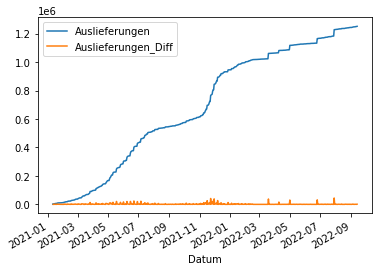

In [ ]:
df_filter.plot()

**Formatierung der Graphik**

Man kann auch nur ausgewählte Spalten darstellen (idF "Auslieferungen_Diff") und angeben, dass man ein Balkendiagramm erstellt werden soll. Auch die Angabe von Beschriftungen ist möglich. Man sieht jedoch, dass die vielen Datumseinträge sich überlappen und die Darstellung nicht optimal ist.

Text(0.5, 0, 'Datum')

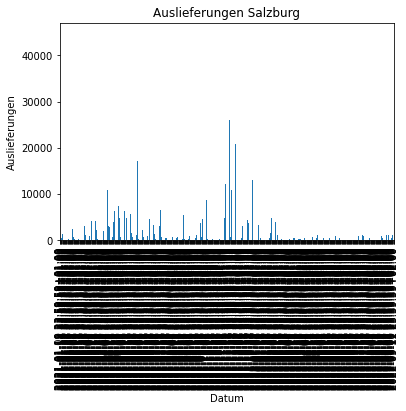

In [ ]:
df_filter['Auslieferungen_Diff'].plot(kind="bar")
plt.title("Auslieferungen Salzburg")
plt.ylabel("Auslieferungen")
plt.xlabel("Datum")

# MatPlotLib
Mit MatPlotLib kann man "schönere" Grafiken erstellen, die im ersten Schritt wieder importiert werden müssen. Die verschiedenen Funktionen bzw. Anwendungsmöglichkeiten findet man unter https://matplotlib.org/

In [ ]:
# Chartzeichenfunktion
import matplotlib.pyplot as plt
# Datumsformatierungsfunktion
import matplotlib.dates as mdates

# es soll die Grafik direkt in Colab dargestellt werden.
%matplotlib inline

**Erstellen der Grafik**

Die Erstellung der Graphik kann wieder über viele Parameter konfiguriert werden.

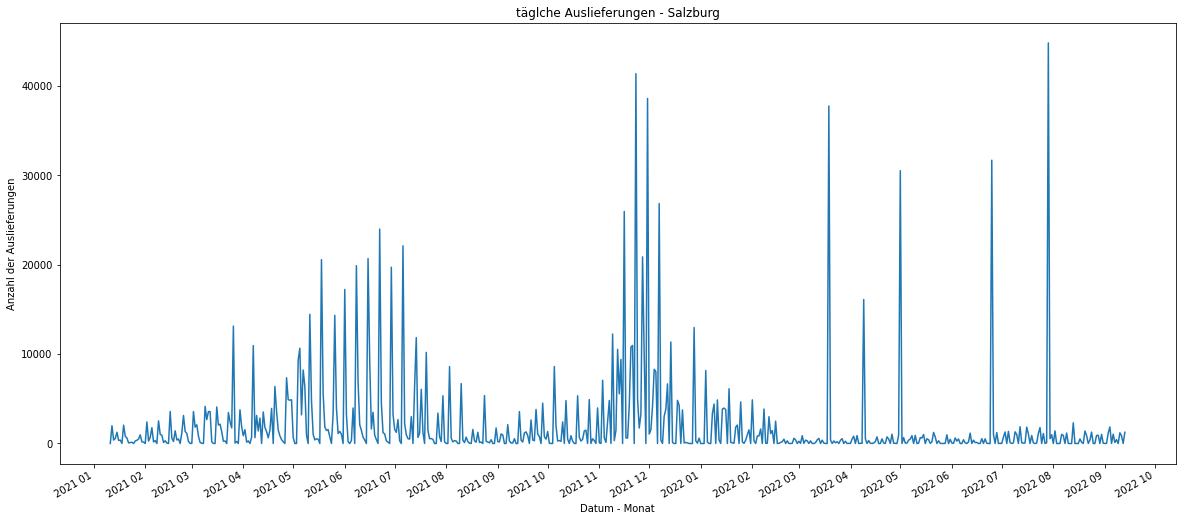

In [ ]:
fig, ax = plt.subplots(figsize=(20,9))
df_filter["Auslieferungen_Diff"].plot(ax=ax)

# Beschriftung hinzufügen
plt.xlabel('Datum - Monat') 
plt.ylabel('Anzahl der Auslieferungen') 
plt.title("täglche Auslieferungen - Salzburg")

# Formatierung der Datumsangaben/ Zeitleiste - idF. Monate erkennen
ax.xaxis.set_major_locator(mdates.MonthLocator())
#Format der Darstellung ist Jahr-Monat
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %m'))

**Ergebnis**

Es wird der zeitliche Verlauf der täglich ausgelieferten Impfdosen in Salzburg dargestellt. Man sieht im Jahr 2021 eine "kontinuierliche" Auslieferung entsprechend der durchgeführten Impfungen. Die Spitzen im Jahr 2022 muss man sich anschauen.